<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-08-08-tree-based-models-bagging-grf-regression-forest-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1xLlN9eEG2IYFBlAuwl53aDVxcBkRnkEw)

# 2.8.8 Regression Forest

A **Regression Forest** is a machine learning model that extends the random forest algorithm to predict continuous outcomes (regression tasks). It consists of an ensemble of decision trees, each trained on a random subset of the data and features, to estimate the conditional mean $E[Y|X=x]$, where $Y$ is the outcome and $X$ are the features. Here's a concise overview:



## Overview

A regression forest is an ensemble learning method that extends the random forest algorithm, originally proposed by Breiman (2001), to predict continuous outcomes (regression) or estimate causal effects. It combines multiple decision trees, each trained on a random subset of the data and features, to produce robust and accurate predictions. The key idea is to average the predictions of many trees to reduce variance and improve generalization. However, A regression forest in the {grf} package in R differs from a regular random forest (as implemented in packages like {randomForest} or {ranger}) in several key ways, primarily due to its focus on advanced statistical tasks like `causal inference`, `honest estimation,` and flexibility for `heterogeneous treatment effects`. The regression forest in {grf} is specifically used to estimate conditional mean outcomes, i.e., predicting a continuous outcome variable based on covariates.



### Key Features of Regression Forests

- **Ensemble of Trees**: Combines predictions from multiple decision trees (e.g., hundreds or thousands) to reduce overfitting and improve accuracy.
- **Randomization**: Each tree is trained on:
  - A random subsample of the data (via bootstrapping or subsampling).
  - A random subset of features at each split.
- **Prediction**: The final prediction is the average of the predictions from all trees, providing a robust estimate of the expected outcome.
- **Honest Splitting** (in some implementations): Splits data into two parts—one for choosing tree splits and another for estimating outcomes in leaves—to reduce bias.
- **Confidence Intervals** (in advanced implementations): Can provide uncertainty estimates for predictions, e.g., via bootstrap methods.

`Specific to `econml.grf.RegressionForest` (Python)`
- Part of the `econml` library, designed for econometrics and causal inference.
- Built on scikit-learn’s regression trees, supporting honest splitting and confidence intervals via a "bootstrap-of-little-bags" approach.
- Used for estimating $E[Y|X=x]$ or as a component in causal models (e.g., `CausalForest`).
- Key parameters: `n_estimators`, `max_depth`, `max_samples`, `honest`.





### How It Work

The `{grf}` package provides the `regression_forest()` function to build a regression forest. Here’s a high-level overview of how it works:

1. Input Data

   - A matrix of features ($X$) and a vector of continuous outcomes ($YY).
   - Optional parameters like the number of trees, minimum node size, and honesty settings.

2. Tree Construction

   - For each tree, a random subset of the data is sampled (with replacement, i.e., bootstrapping).
   - At each node, a random subset of features is considered, and the best split is chosen to minimize a loss function (e.g., mean squared error for regression).
   - If honesty is enabled, the data is split into two parts: one for building the tree structure and another for estimating leaf values.

3. Prediction

   - For a new data point, each tree predicts an outcome based on the leaf it falls into.
   - The final prediction is the average of all tree predictions (or a weighted average in some cases).

4. Output

   - For standard regression, the output is a predicted value for each input.
   - For causal inference tasks (using `causal_forest()`), the output includes estimated treatment effects or other statistical quantities.



### Advantages of Regression Forests

- `Flexibility`: Handles standard regression, causal inference, and quantile regression in one framework.
- `Robustness`: Performs well in high-dimensional settings and with noisy data.
- `Causal Inference`: Unique in its ability to estimate heterogeneous treatment effects, which is critical in fields like economics, medicine, and policy analysis.
- `Honesty`: Reduces bias in predictions, especially for causal inference tasks.
- `Scalability`: Efficiently handles large datasets with many features.


### Limitations

- `Computational Cost`: Training a large number of trees on big datasets can be slow, though `{grf}` is optimized for performance.
- `Interpretability`: While variable importance measures are available, random forests are less interpretable than simpler models like linear regression.
- `Tuning`: Requires careful tuning of parameters (e.g., number of trees, node size) for optimal performance.

### Key differences between Regression Forests in `{grf}` and Regular Random Forests


A **regression forest** in the `{grf}` package in R differs from a **regular random forest** (as implemented in packages like `{randomForest}` or `{ranger}`) in several key ways, primarily due to its focus on advanced statistical tasks like causal inference, honest estimation, and flexibility for heterogeneous treatment effects. Below, I outline the main differences in a concise and structured manner:


| Feature                     | Regular Random Forest | Regression Forest in `{grf}` |
|-----------------------------|-----------------------|-----------------------------|
| `Primary Use`             | Prediction            | Prediction, Causal Inference, Quantile Regression |
| `Honest Splitting`        | No                    | Yes (reduces bias)          |
| `Causal Inference`        | Limited               | Built-in (`causal_forest`)  |
| `Local Linear Corrections`| No                    | Yes                         |
| `Quantile Regression`     | Limited (requires add-ons) | Built-in (`quantile_forest`) |
| `Statistical Inference`   | Minimal               | Confidence intervals, asymptotic guarantees |
| `Theoretical Grounding`   | Empirical             | Advanced (Athey & Wager)    |
| `Speed`                   | Faster                | Slower (due to rigor)       |




## Regression Forest with Python

The `RegressionForest` of {EconML} is a flexible estimator for regression tasks and can be used as a base learner in meta-learners or by itself for non-causal regression. Below is a basic example of using RegressionForest in Python with EconML.






In [ ]:
!pip install econml

In [3]:
import pandas as pd
import numpy as np
from econml.grf import RegressionForest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Load and Prepare the Dataset

The lung dataset contains survival data for lung cancer patients with variables like `time` (survival time), `status` (censoring indicator), `age`, s`ex`, and `ph.ecog` (ECOG performance score). We’ll simulate a binary `health_status `variable (1 = improved, 0 = not improved) and use age, sex, and ph.ecog as covariates.


In [4]:
# Load and prepare the Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston_df = pd.DataFrame(data, columns=feature_names)
boston_df['medv'] = target
boston_df = boston_df.dropna()

# Prepare features and target
X = boston_df[feature_names]
y = boston_df['medv']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fit Regression Forest Model

regression_forest() is a function from the `{grf}` package that fits a regression forest model to the training data. It uses the features (X_train) and target variable (Y_train) to build the model, with options for the number of trees and honesty.

In [5]:
# Initialize and fit the RegressionForest model
regr = RegressionForest(n_estimators=1000, max_depth=10, min_samples_leaf=5, random_state=42, honest=True)
regr.fit(X_train, y_train)

RegressionForest(max_depth=10, n_estimators=1000, random_state=42)

### Prediction and Evaluation

In [6]:
# Predict on test set
y_pred = regr.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test R^2: {r2:.2f}")

Test MSE: 18.03
Test R^2: 0.75


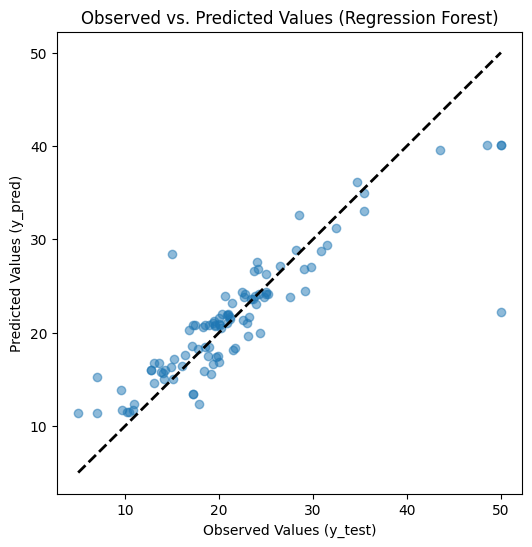

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # 1:1 line
plt.xlabel("Observed Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Observed vs. Predicted Values (Regression Forest)")
plt.show()

### Cross-Valiadtion

In [8]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(regr, X, y, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Mean CV R^2: {cv_scores.mean():.2f} (± {cv_scores.std():.2f})")

Cross-validation R^2 scores: [0.78375785 0.8120444  0.55618565 0.40420734 0.26186641]
Mean CV R^2: 0.56 (± 0.21)


### Feature Importance

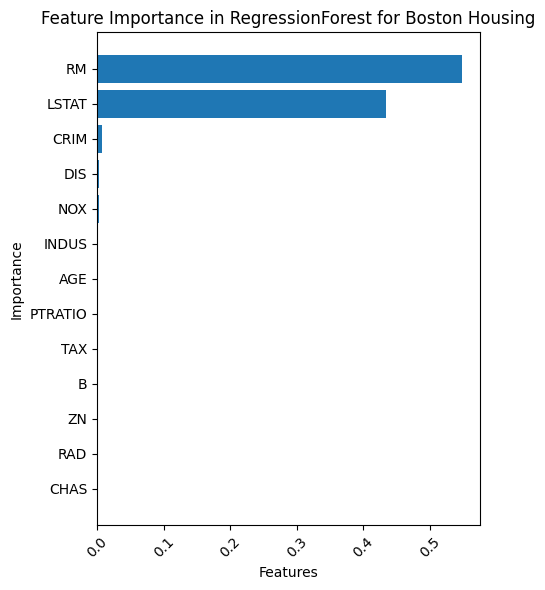

In [9]:
# Get feature importance
feature_importance = regr.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(5, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in RegressionForest for Boston Housing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Regression Forest for Causal Inference

To fit a **Regression Forest** using the `regression_forest()` function from the `{grf}` package in R for a causal inference task, we need to adapt the approach since `regression_forest()` is typically used for predicting conditional means ($E[Y | X]$) rather than directly estimating treatment effects like `causal_forest()`. However, we can use `regression_forest()` to estimate treatment effects indirectly by modeling the outcome $Y$ as a function of covariates $X$ and treatment $W$ then deriving treatment effects through predictions under different treatment conditions.

Use `regression_forest()` to estimate conditional mean outcomes and derive heterogeneous treatment effects ($\tau(X) = E[Y | X, W=1] - E[Y | X, W=0]$).




### Synthetic Data Generation

   - `X`: Matrix of 5 covariates drawn from a standard normal distribution.
   - `W`: Binary treatment indicator (0 or 1), randomly assigned with equal probability (simulating a randomized experiment).
   - `tau`: True treatment effect, set as $\tau = 2 \cdot X_1$, making it heterogeneous.
   - `Y`: Outcome, generated as $Y = X_1 + X_2^2 + \tau \cdot W + \text{noise}$.
   - `XW`: Combines covariates and treatment into a single matrix for modeling.


In [33]:
# Set seed for reproducibility
np.random.seed(123)

# Generate synthetic experimental data
n = 1000  # Number of observations
p = 5     # Number of covariates
X = np.random.randn(n, p)  # Covariates
W = np.random.randint(0, 2, n)           # Binary treatment (0 or 1, balanced)
# True treatment effect: depends on X[:,0]
tau = 2 * X[:, 0]  # Heterogeneous treatment effect
# Outcome: Y = baseline + treatment effect + noise
Y = X[:, 0] + X[:, 1]**2 + tau * W + np.random.randn(n) * 0.5

# Combine covariates and treatment into a single matrix
XW = np.c_[X, W]


### Fitting the Regression Forest

This code initializes and trains a RegressionForest model from the econml library on the synthetic data (XW and Y) for causal inference, using 1000 trees and honest splitting.



In [34]:
# Initialize and fit the RegressionForest model
# Note: Parameters are matched as closely as possible to the R code,
# using econml.grf.RegressionForest parameter names.
# honest=True enables honest splitting.
rf = RegressionForest(
    n_estimators=1000,
    max_depth=10, # Note: R's min.node.size=5 is not directly max_depth, but influences tree structure.
                  # We'll use max_depth=10 and min_samples_leaf=5 as reasonable defaults
                  # based on the typical relationship between these parameters and tree complexity,
                  # and the R code using min.node.size=5.
    min_samples_leaf=5,
    random_state=42, # Setting a random state for reproducibility
    honest=True,
    # sample.fraction=0.5 is the default in econml.grf.RegressionForest
    # ci.group.size=2 is related to confidence intervals, not directly model fitting structure.
)

# Fit the model to the synthetic data (XW and Y)
rf.fit(XW, Y)

print("RegressionForest model fitted successfully.")

RegressionForest model fitted successfully.


###  Predicting Treatment Effects

This code predicts outcomes under treatment and control using the trained model, then calculates individual treatment effects (`tau_hat`) and their standard errors based on prediction intervals. It prints the first few results.

In [35]:
# Predict outcomes for the treatment and control scenarios using the new model
alpha = 0.05
z_alpha_half = 1.96 # For 95% confidence interval

# Use the new model fitted on synthetic data
# Unpack the tuple returned by predict with interval=True
pred_treat_predictions, pred_treat_lower, pred_treat_upper = regr_synthetic.predict(XW_treat, interval=True, alpha=alpha)
pred_control_predictions, pred_control_lower, pred_control_upper = regr_synthetic.predict(XW_control, interval=True, alpha=alpha)

# Estimate treatment effects (point estimate)
tau_hat = pred_treat_predictions - pred_control_predictions

# Estimate standard error of the prediction from confidence intervals
# SE = CI width / (2 * Z_alpha/2)
se_pred_treat = (pred_treat_upper - pred_treat_lower) / (2 * z_alpha_half)
se_pred_control = (pred_control_upper - pred_control_lower) / (2 * z_alpha_half)

# Calculate the standard error of the treatment effect (tau_hat)
# SE(tau_hat) = sqrt(Var(pred_treat) + Var(pred_control))
# Var = SE^2
tau_se = np.sqrt(se_pred_treat**2 + se_pred_control**2)

print("Treatment effects (tau_hat) calculated. First 5 values:")
print(tau_hat[:5])
print("\nStandard errors of treatment effects (tau_se) calculated. First 5 values:")
print(tau_se[:5])

Treatment effects (tau_hat) calculated. First 5 values:
[[-2.08938498]
 [ 2.10685789]
 [-1.37414651]
 [-0.5747332 ]
 [ 1.05510659]]

Standard errors of treatment effects (tau_se) calculated. First 5 values:
[[0.28142061]
 [0.62345271]
 [0.17133268]
 [1.07628874]
 [0.63803497]]


### Evalute the Model

   - Compare predicted treatment effects ($\hat{\tau}$) with true treatment effects ($\tau$).
   - Calculate Mean Squared Error (MSE) to evaluate the accuracy of CATE estimates.
   - Variable importance can be assessed to understand the contribution of each feature in predicting treatment effects.

In [36]:
from sklearn.metrics import mean_squared_error

# Evaluate model: Compare predicted vs true treatment effects
# Use the true tau generated with the synthetic data and the calculated tau_hat
mse = mean_squared_error(tau, tau_hat)
print(f"Mean Squared Error of CATE estimates: {mse}")

Mean Squared Error of CATE estimates: 0.41885543012162


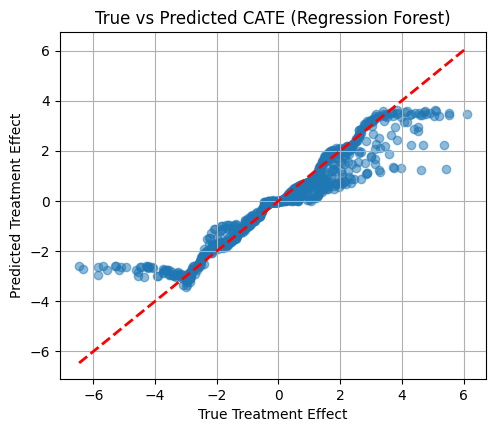

In [40]:
# Plot predicted vs true treatment effects
plt.figure(figsize=(5.5, 4.5))
plt.scatter(tau, tau_hat, alpha=0.5)
plt.plot([tau.min(), tau.max()], [tau.min(), tau.max()], 'r--', lw=2) # 45-degree line
plt.xlabel("True Treatment Effect")
plt.ylabel("Predicted Treatment Effect")
plt.title("True vs Predicted CATE (Regression Forest)")
plt.grid(True)
plt.show()

### Variable Importance

   - Assess variable importance to understand which features contribute most to the model's predictions.
   - The `variable_importance()` function provides a measure of how much each feature contributes to the prediction accuracy.


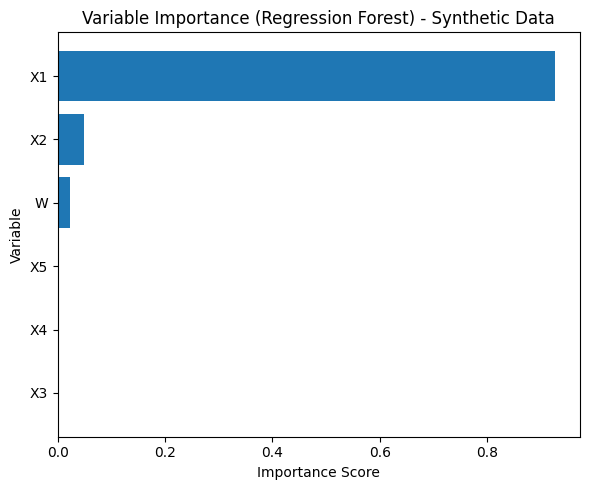

In [39]:
# Get feature importance from the fitted RegressionForest model
# The feature_importances_ attribute provides the importance scores.
feature_importance = regr_synthetic.feature_importances_

# Define the column names for the synthetic data
# X has 5 features, W is the 6th feature
synthetic_feature_names = [f'X{i+1}' for i in range(p)] + ['W']

# Create a pandas DataFrame for importance scores
importance_df_synthetic = pd.DataFrame({
    'Variable': synthetic_feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by 'Importance' in ascending order for the bar plot
importance_df_synthetic = importance_df_synthetic.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(6, 5)) # Adjusted figure size for horizontal bars
plt.barh(importance_df_synthetic['Variable'], importance_df_synthetic['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Variable')
plt.title('Variable Importance (Regression Forest) - Synthetic Data')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Summary and Conclusion

 The notebook then shifts to the `econml.grf.RegressionForest` in Python, which is a standard regression forest for predicting continuous outcomes. It describes the key characteristics of regression forests and how the `econml` implementation works, including honest splitting. Using the Boston Housing dataset, it demonstrates loading and preparing the data, training the `RegressionForest` model, evaluating its performance using MSE and R-squared, visualizing observed vs. predicted values, and assessing feature importance.


  